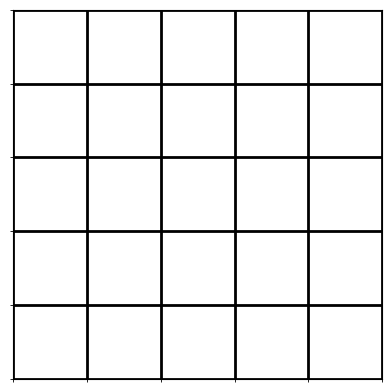

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]


Player's move (0-4):  3


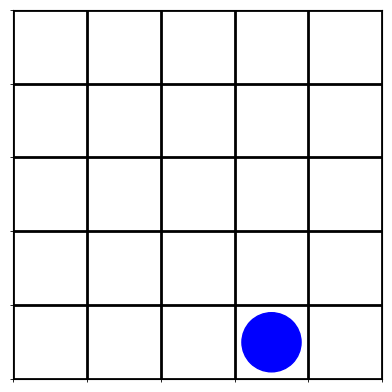

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 1, 0]
AI is thinking...


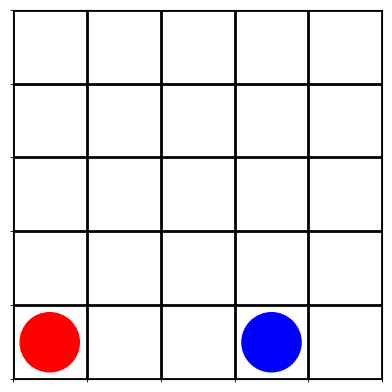

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[2, 0, 0, 1, 0]


Player's move (0-4):  0


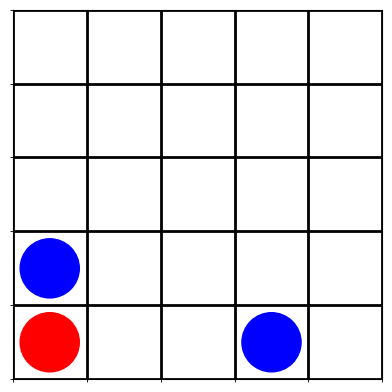

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[2, 0, 0, 1, 0]
AI is thinking...


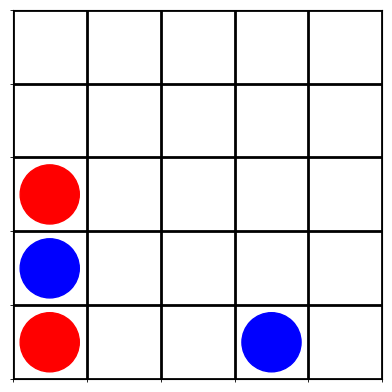

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[2, 0, 0, 1, 0]


Player's move (0-4):  4


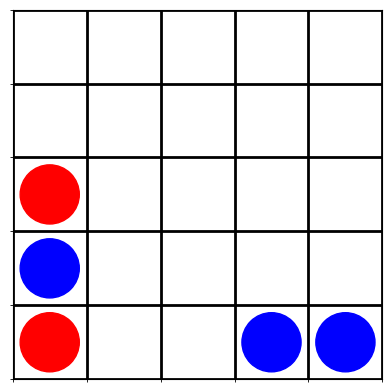

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[2, 0, 0, 1, 1]
AI is thinking...


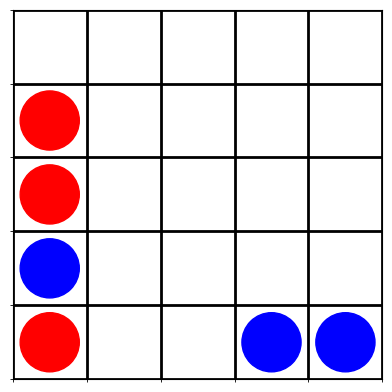

[0, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[2, 0, 0, 1, 1]


Player's move (0-4):  1


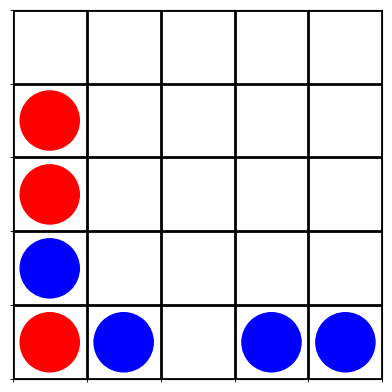

[0, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[2, 1, 0, 1, 1]
AI is thinking...


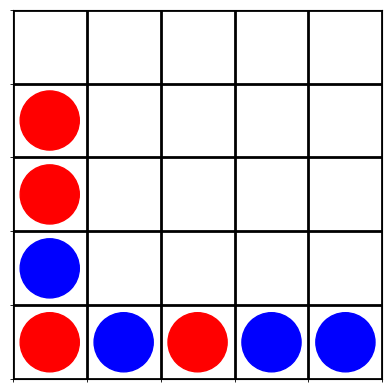

[0, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[2, 1, 2, 1, 1]


Player's move (0-4):  2


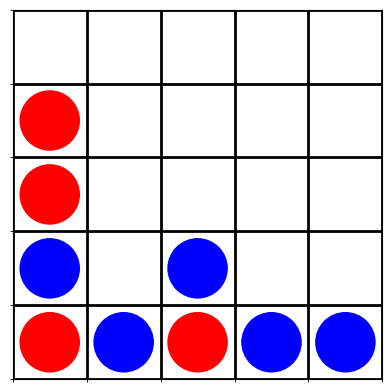

[0, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[1, 0, 1, 0, 0]
[2, 1, 2, 1, 1]
AI is thinking...


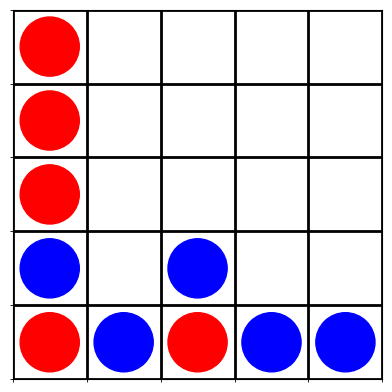

[2, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[1, 0, 1, 0, 0]
[2, 1, 2, 1, 1]


Player's move (0-4):  1


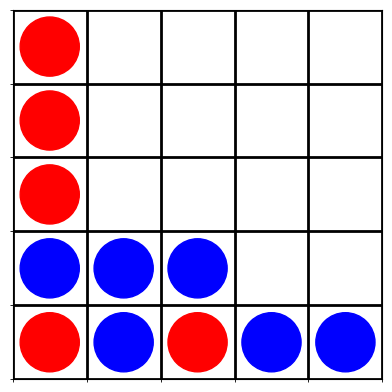

[2, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[1, 1, 1, 0, 0]
[2, 1, 2, 1, 1]
AI is thinking...


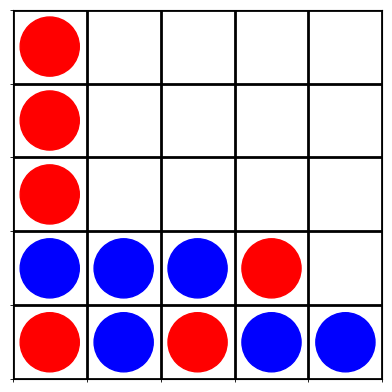

[2, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[1, 1, 1, 2, 0]
[2, 1, 2, 1, 1]


Player's move (0-4):  1


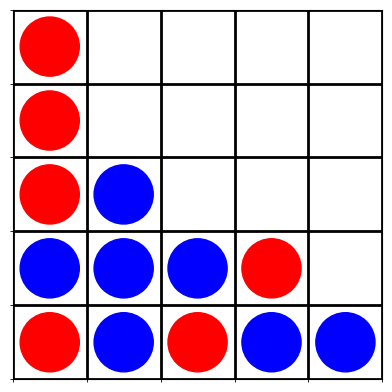

[2, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[2, 1, 0, 0, 0]
[1, 1, 1, 2, 0]
[2, 1, 2, 1, 1]
AI is thinking...


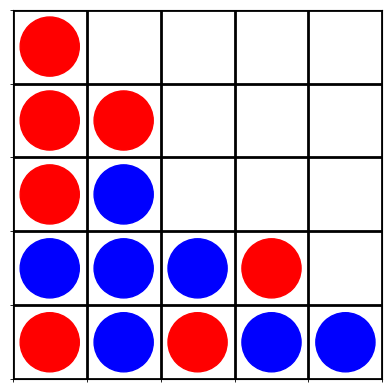

[2, 0, 0, 0, 0]
[2, 2, 0, 0, 0]
[2, 1, 0, 0, 0]
[1, 1, 1, 2, 0]
[2, 1, 2, 1, 1]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
# Constants
ROW_COUNT = 5
COLUMN_COUNT = 5
PLAYER = 1
AI = 2
EMPTY = 0

# Create a new game board
def create_board():
    return [[0 for _ in range(COLUMN_COUNT)] for _ in range(ROW_COUNT)]

# Check if the board is full
def is_board_full(board):
    for row in board:
        if EMPTY in row:
            return False
    return True

# Print the board (console)
def print_board(board):
    for row in board:
        print(row)

# Get all valid moves
def get_valid_moves(board):
    return [col for col in range(COLUMN_COUNT) if board[0][col] == EMPTY]


def get_available_row(board, col):
    for row in range(ROW_COUNT - 1, -1, -1):
        if board[row][col] == EMPTY:
            return row
    return None

def check_winner(board, player):
    for row in range(ROW_COUNT):
        for col in range(COLUMN_COUNT):
            # Horizontal
            if col + 3 < COLUMN_COUNT and all(board[row][col + i] == player for i in range(4)):
                return True
            # Vertical
            if row + 3 < ROW_COUNT and all(board[row + i][col] == player for i in range(4)):
                return True
            # Diagonal /
            if row - 3 >= 0 and col + 3 < COLUMN_COUNT and all(board[row - i][col + i] == player for i in range(4)):
                return True
            # Diagonal \
            if row + 3 < ROW_COUNT and col + 3 < COLUMN_COUNT and all(board[row + i][col + i] == player for i in range(4)):
                return True
    return False

# Evaluate the board (for heuristic scoring)
def evaluate_board(board):
    score = 0
    for row in board:
        for cell in row:
            if cell == AI:
                score += 1
            elif cell == PLAYER:
                score -= 1
    return score

# Minimax with Alpha-Beta Pruning
def minimax(board, depth, alpha, beta, is_maximizing):
    valid_moves = get_valid_moves(board)
    is_terminal = check_winner(board, PLAYER) or check_winner(board, AI) or is_board_full(board)

    if depth == 0 or is_terminal:
        if check_winner(board, AI):
            return 1e10
        elif check_winner(board, PLAYER):
            return -1e10
        else:
            return evaluate_board(board)

    if is_maximizing:
        max_eval = -math.inf
        for col in valid_moves:
            row = get_available_row(board, col)
            board[row][col] = AI
            eval = minimax(board, depth - 1, alpha, beta, False)
            board[row][col] = EMPTY
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = math.inf
        for col in valid_moves:
            row = get_available_row(board, col)
            board[row][col] = PLAYER
            eval = minimax(board, depth - 1, alpha, beta, True)
            board[row][col] = EMPTY
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval

# AI selects the best move
def ai_move(board, depth):
    best_value = -math.inf
    best_move = None
    for col in get_valid_moves(board):
        row = get_available_row(board, col)
        board[row][col] = AI
        value = minimax(board, depth - 1, -math.inf, math.inf, False)
        board[row][col] = EMPTY
        if value > best_value:
            best_value = value
            best_move = col
    return best_move

# Visualize the board using matplotlib
def visualize_board(board):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(COLUMN_COUNT + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(ROW_COUNT + 1) - 0.5, minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-0.5, COLUMN_COUNT - 0.5)
    ax.set_ylim(-0.5, ROW_COUNT - 0.5)

    for r in range(ROW_COUNT):
        for c in range(COLUMN_COUNT):
            token = board[r][c]
            color = 'white'
            if token == PLAYER:
                color = 'blue'
            elif token == AI:
                color = 'red'
            circle = plt.Circle((c, ROW_COUNT - 1 - r), 0.4, color=color)
            ax.add_patch(circle)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Main game loop
def play_game():
    board = create_board()
    game_over = False
    turn = PLAYER

    while not game_over:
        visualize_board(board)
        print_board(board)

        if turn == PLAYER:
            try:
                col = int(input("Player's move (0-4): "))
                if col < 0 or col >= COLUMN_COUNT or board[0][col] != EMPTY:
                    print("Invalid move. Try again.")
                    continue
            except ValueError:
                print("Invalid input. Enter an integer.")
                continue
            row = get_available_row(board, col)
            board[row][col] = PLAYER
            if check_winner(board, PLAYER):
                visualize_board(board)
                print("Player wins!")
                game_over = True
            turn = AI
        else:
            print("AI is thinking...")
            col = ai_move(board, 5)
            if col is not None:
                row = get_available_row(board, col)
                board[row][col] = AI
                if check_winner(board, AI):
                    visualize_board(board)
                    print("AI wins!")
                    game_over = True
                turn = PLAYER

        if is_board_full(board):
            visualize_board(board)
            print("It's a tie!")
            game_over = True

# Run the game
if __name__ == "__main__":
    play_game()
